In [27]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

## Antes de começar as análises coloque o caminho do aqruivo na célula abaixo

In [28]:
caminho_do_arquivo = r"C:\Users\sonia\Desktop\Lucas Geral\Cars\car_web_scraped_dataset.csv"

df = pd.read_csv(caminho_do_arquivo)
df.columns

Index(['name', 'year', 'miles', 'color', 'condition', 'price'], dtype='object')

In [29]:
df.tail()

,name,year,miles,color,condition,price
2835,Ford Escape,2013,"98,601 miles","Silver exterior, Unknown interior","2 accidents reported, 3 Owners","$8,995"
2836,Mercedes-Benz R-Class,2009,"120,694 miles","Black exterior, Black interior","1 accident reported, 3 Owners","$9,495"
2837,Mercedes-Benz GLC,2022,"27,894 miles","Gray exterior, Gray interior","No accidents reported, 2 Owners","$29,999"
2838,Honda CR-V,2021,"50,220 miles","Gray exterior, Unknown interior","No accidents reported, 1 Owner","$22,992"
2839,Honda Civic,2021,"26,510 miles","White exterior, Black interior","No accidents reported, 1 Owner","$24,135"


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       2840 non-null   object
 1   year       2840 non-null   int64 
 2   miles      2840 non-null   object
 3   color      2840 non-null   object
 4   condition  2840 non-null   object
 5   price      2840 non-null   object
dtypes: int64(1), object(5)
memory usage: 133.2+ KB


In [31]:
df.dropna()

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998"
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498"
...,...,...,...,...,...,...
2835,Ford Escape,2013,"98,601 miles","Silver exterior, Unknown interior","2 accidents reported, 3 Owners","$8,995"
2836,Mercedes-Benz R-Class,2009,"120,694 miles","Black exterior, Black interior","1 accident reported, 3 Owners","$9,495"
2837,Mercedes-Benz GLC,2022,"27,894 miles","Gray exterior, Gray interior","No accidents reported, 2 Owners","$29,999"
2838,Honda CR-V,2021,"50,220 miles","Gray exterior, Unknown interior","No accidents reported, 1 Owner","$22,992"


In [32]:
# código para paadronizar todas as palavras no df em minuscula

df['name'] = df['name'].str.lower()
df['color'] = df['color'].str.lower()
df['condition'] = df['condition'].str.lower()
df.tail()

,name,year,miles,color,condition,price
2835,ford escape,2013,"98,601 miles","silver exterior, unknown interior","2 accidents reported, 3 owners","$8,995"
2836,mercedes-benz r-class,2009,"120,694 miles","black exterior, black interior","1 accident reported, 3 owners","$9,495"
2837,mercedes-benz glc,2022,"27,894 miles","gray exterior, gray interior","no accidents reported, 2 owners","$29,999"
2838,honda cr-v,2021,"50,220 miles","gray exterior, unknown interior","no accidents reported, 1 owner","$22,992"
2839,honda civic,2021,"26,510 miles","white exterior, black interior","no accidents reported, 1 owner","$24,135"


In [33]:
# código para dropar os valores duplicados no df na coluna 'name'
df_sem_duplicados = df['name'].drop_duplicates()
df_sem_duplicados

0                          kia forte
1           chevrolet silverado 1500
2                        toyota rav4
3                        honda civic
6                       honda accord
                    ...             
2707                       jaguar xj
2751                ford thunderbird
2755                  dodge ram 1500
2810           ford super duty f-350
2829    volkswagen atlas cross sport
Name: name, Length: 309, dtype: object

In [34]:
# código para juntar nomes de marcas que estão separados no df

df['name'] = df['name'].apply(lambda nome: 'land_rover range rover sport' if nome == 'land rover range rover sport' else nome)
df['name'] = df['name'].apply(lambda nome: 'land_rover range rover' if nome == 'land rover range rover' else nome)
df['name'] = df['name'].apply(lambda nome: 'land_rover range rover velar' if nome == 'land rover range rover velar' else nome)
df['name'] = df['name'].apply(lambda nome: 'land_rover defender' if nome == 'land rover defender' else nome)
df['name'] = df['name'].apply(lambda nome: 'alfa_romeo giulia' if nome == 'alfa romeo giulia' else nome)
df['name'] = df['name'].apply(lambda nome: 'land_rover range rover evoque' if nome == 'land rover range rover evoque' else nome)
df['name'] = df['name'].apply(lambda nome: 'land_rover discovery' if nome == 'land rover discovery' else nome)
df['name'] = df['name'].apply(lambda nome: 'aston_martin db9' if nome == 'aston martin db9' else nome)
df['name'] = df['name'].apply(lambda nome: 'alfa_romeo stelvio' if nome == 'alfa romeo stelvio' else nome)
df['name'] = df['name'].apply(lambda nome: 'land_rovver discovery sport' if nome == 'land rover discovery sport' else nome)
df['name'] = df['name'].apply(lambda nome: 'aston_martin vantage' if nome == 'aston martin vantage' else nome)
df['name'] = df['name'].apply(lambda nome: 'land_rover lr4' if nome == 'land rover lr4' else nome)


df.head()

,name,year,miles,color,condition,price
0,kia forte,2022,"41,406 miles","gray exterior, black interior","no accidents reported, 1 owner","$15,988"
1,chevrolet silverado 1500,2021,"15,138 miles","white exterior, black interior","1 accident reported, 1 owner","$38,008"
2,toyota rav4,2022,"32,879 miles","silver exterior, unknown interior","no accidents reported, 1 owner","$24,988"
3,honda civic,2020,"37,190 miles","blue exterior, black interior","no accidents reported, 1 owner","$18,998"
4,honda civic,2020,"27,496 miles","black exterior, black interior","no accidents reported, 1 owner","$19,498"


In [35]:
# código para visualização de dados

df_visualizar = df[df['name'] == 'alfa_romeo stelvio']
print(df_visualizar)

                    name  year     miles                           color  \
1109  alfa_romeo stelvio  2022  25 miles  black exterior, black interior   
1246  alfa_romeo stelvio  2022  68 miles  white exterior, black interior   
1323  alfa_romeo stelvio  2022  25 miles  black exterior, black interior   
1403  alfa_romeo stelvio  2022  88 miles   gray exterior, black interior   
1472  alfa_romeo stelvio  2022  68 miles  white exterior, black interior   
1494  alfa_romeo stelvio  2022  85 miles  black exterior, black interior   
1659  alfa_romeo stelvio  2022  65 miles  black exterior, black interior   
1776  alfa_romeo stelvio  2022  25 miles    red exterior, black interior   
1804  alfa_romeo stelvio  2022  86 miles  white exterior, black interior   
1815  alfa_romeo stelvio  2022  64 miles  black exterior, black interior   
1859  alfa_romeo stelvio  2022  63 miles  black exterior, black interior   
2023  alfa_romeo stelvio  2022  25 miles    red exterior, black interior   
2050  alfa_r

In [36]:
# código para tratar a coluna 'name', separar a marca do carro do modelo em dus colunas diferentes

df['montadora'] = df['name'].apply(lambda marca: str(marca.split(sep=' ')[0].strip()))
df['nome'] = df['name'].apply(lambda name: str(name.split(sep=' ', maxsplit=1)[1].strip()) if ' ' in name else name)

df_marca_visualizar = df[df['montadora'] == 'land_rover']
print(df_marca_visualizar)

                               name  year          miles  \
43     land_rover range rover sport  2016   74,525 miles   
138    land_rover range rover sport  2013  124,544 miles   
146    land_rover range rover sport  2021   53,743 miles   
154          land_rover range rover  2018   35,993 miles   
190    land_rover range rover velar  2019   26,989 miles   
241          land_rover range rover  2014   74,950 miles   
245    land_rover range rover sport  2014  109,322 miles   
246    land_rover range rover sport  2015   25,995 miles   
289    land_rover range rover velar  2019   26,989 miles   
324             land_rover defender  2020   32,049 miles   
370    land_rover range rover sport  2016   64,238 miles   
448   land_rover range rover evoque  2020   29,921 miles   
457            land_rover discovery  2017   55,590 miles   
470    land_rover range rover velar  2018   33,452 miles   
493            land_rover discovery  2020   62,802 miles   
512          land_rover range rover  201

In [37]:
# código para visualização de dados

df_name = df[df['nome'] == 'range rover evoque']
print(df_name)

                               name  year         miles  \
448   land_rover range rover evoque  2020  29,921 miles   
704   land_rover range rover evoque  2014  81,607 miles   
764   land_rover range rover evoque  2012  95,743 miles   
1517  land_rover range rover evoque  2019  45,704 miles   
2047  land_rover range rover evoque  2020  11,081 miles   
2491  land_rover range rover evoque  2023   8,503 miles   
2667  land_rover range rover evoque  2020  63,634 miles   

                               color                        condition  \
448   black exterior, black interior  no accidents reported, 2 owners   
704   black exterior, black interior  no accidents reported, 2 owners   
764   white exterior, white interior  no accidents reported, 2 owners   
1517  white exterior, black interior    1 accident reported, 3 owners   
2047  white exterior, black interior  no accidents reported, 2 owners   
2491   gray exterior, black interior   no accidents reported, 1 owner   
2667  black exte

In [38]:
# código para padronzação de valores de milhas com vírgula para o padrão brasileiro com ponto

df['miles'] = df['miles'].apply(lambda milhas: int(milhas.split(sep=' ')[0].strip().replace(',','')))

In [39]:
# código para padronização de valores, separei a informação de cor em duas colunas com os dados de cor interior e cor exterior

df['color_exterior'] = df['color'].apply(lambda cor: str(cor.split(sep=',')[0].split(sep=' ')[0].strip()))
df['color_interior'] = df['color'].apply(lambda cor: str(cor.split(sep=',')[1].split(sep=' ')[1].strip()))

In [40]:
df.tail()

,name,year,miles,color,condition,price,montadora,nome,color_exterior,color_interior
2835,ford escape,2013,98601,"silver exterior, unknown interior","2 accidents reported, 3 owners","$8,995",ford,escape,silver,unknown
2836,mercedes-benz r-class,2009,120694,"black exterior, black interior","1 accident reported, 3 owners","$9,495",mercedes-benz,r-class,black,black
2837,mercedes-benz glc,2022,27894,"gray exterior, gray interior","no accidents reported, 2 owners","$29,999",mercedes-benz,glc,gray,gray
2838,honda cr-v,2021,50220,"gray exterior, unknown interior","no accidents reported, 1 owner","$22,992",honda,cr-v,gray,unknown
2839,honda civic,2021,26510,"white exterior, black interior","no accidents reported, 1 owner","$24,135",honda,civic,white,black


In [41]:
# padronização, separação da coluna "condition" em duas colunas com os dados de acidentes registrados e owners

df['accidents_reported'] = df['condition'].apply(lambda acidentes: str(acidentes.split(sep=',')[0].split(sep=' ')[0].strip()))
df['accidents_reported'] = df['accidents_reported'].apply(lambda zero: int('0' if zero == 'no' else zero))

df['owners'] = df['condition'].apply(lambda donos: int(donos.split(sep=',')[1].strip().split(sep=' ')[0].strip()))

In [42]:
df.tail()

,name,year,miles,color,condition,price,montadora,nome,color_exterior,color_interior,accidents_reported,owners
2835,ford escape,2013,98601,"silver exterior, unknown interior","2 accidents reported, 3 owners","$8,995",ford,escape,silver,unknown,2,3
2836,mercedes-benz r-class,2009,120694,"black exterior, black interior","1 accident reported, 3 owners","$9,495",mercedes-benz,r-class,black,black,1,3
2837,mercedes-benz glc,2022,27894,"gray exterior, gray interior","no accidents reported, 2 owners","$29,999",mercedes-benz,glc,gray,gray,0,2
2838,honda cr-v,2021,50220,"gray exterior, unknown interior","no accidents reported, 1 owner","$22,992",honda,cr-v,gray,unknown,0,1
2839,honda civic,2021,26510,"white exterior, black interior","no accidents reported, 1 owner","$24,135",honda,civic,white,black,0,1


In [43]:
# padronização dos dados de preço do carro, mudei do padrçao norte americano com vírgula para o ponto

df['price'] = df['price'].apply(lambda preco: int(preco.split(sep='$')[-1].strip().replace(',','')))

In [44]:
df.tail()

,name,year,miles,color,condition,price,montadora,nome,color_exterior,color_interior,accidents_reported,owners
2835,ford escape,2013,98601,"silver exterior, unknown interior","2 accidents reported, 3 owners",8995,ford,escape,silver,unknown,2,3
2836,mercedes-benz r-class,2009,120694,"black exterior, black interior","1 accident reported, 3 owners",9495,mercedes-benz,r-class,black,black,1,3
2837,mercedes-benz glc,2022,27894,"gray exterior, gray interior","no accidents reported, 2 owners",29999,mercedes-benz,glc,gray,gray,0,2
2838,honda cr-v,2021,50220,"gray exterior, unknown interior","no accidents reported, 1 owner",22992,honda,cr-v,gray,unknown,0,1
2839,honda civic,2021,26510,"white exterior, black interior","no accidents reported, 1 owner",24135,honda,civic,white,black,0,1


c:\Users\sonia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


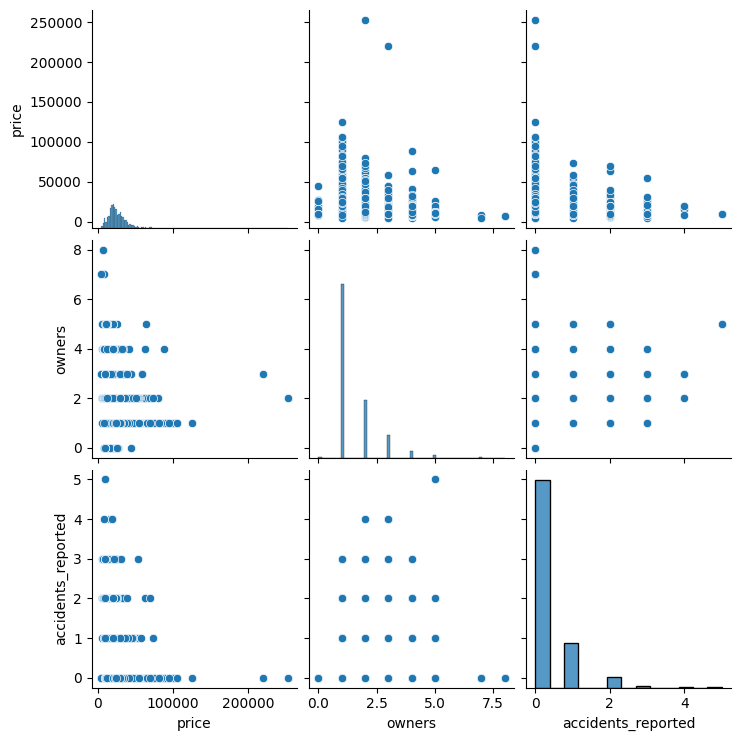

In [45]:
sns.pairplot(df[['price','owners', 'accidents_reported', 'montadora']]);

Podemos observar que os dados de owners e acidentes reportados interferem bastante no valor do carro

In [46]:
def visualizacao(filtro_coluna:str, filtro_valor:str, x:str, y:str):

  filtro_coluna = str(filtro_coluna)
  filtro_valor = str(filtro_valor)
  x = str(x)
  y = str(y)
  df_filtrado = df.loc[df[filtro_coluna] == filtro_valor]

  with sns.axes_style('whitegrid'):
    grafico = sns.barplot(data=df_filtrado, x=x, y=y, color='steelblue')
    grafico.set(title="Comparação do "+y+" por "+x+" da coluna "+filtro_coluna+" filtrada por "+filtro_valor)

    for p in grafico.patches:
      grafico.annotate(f'{p.get_height().round(2)}', (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center', fontsize=10, color='black', xytext=(0, -50),
              textcoords='offset points')


    return grafico


# Abaixo a comparação do preço das montadoras, toyota, honda e ford com o número de acidentes reportados e quantidade de donos.

O objetivo dessa comparação é saber se esses dados interferem diretamente nos valores dos carros dessas montadoras específicas.

## toyota

<Axes: title={'center': 'Comparação do price por accidents_reported da coluna montadora filtrada por toyota'}, xlabel='accidents_reported', ylabel='price'>

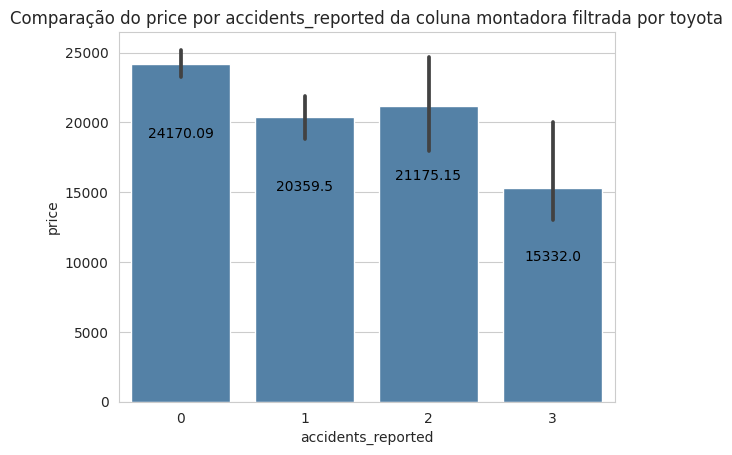

In [47]:
visualizacao('montadora', 'toyota', 'accidents_reported', 'price')

Comentários:
Analisando o gráfico podemos notar que o numero de acidentes interfere negativamente nos valores dos carros da montadora toyota, não chega a ser um valor muito notável porém é existente.

<Axes: title={'center': 'Comparação do price por owners da coluna montadora filtrada por toyota'}, xlabel='owners', ylabel='price'>

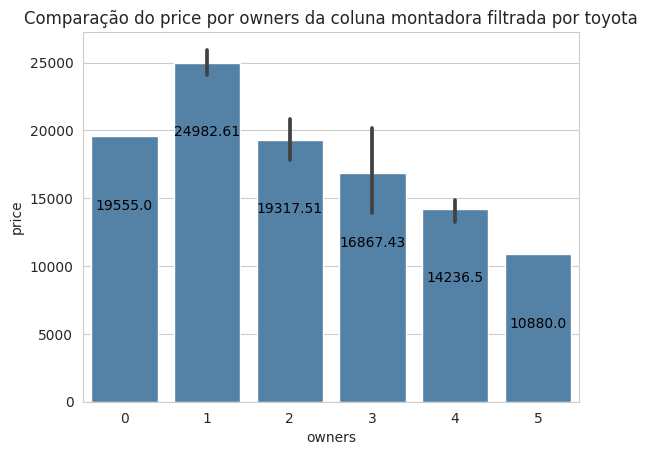

In [48]:
visualizacao('montadora', 'toyota', 'owners', 'price')

Comentários:
O número de donos também interfere negativamente nos valores dos carros.

## honda

<Axes: title={'center': 'Comparação do price por accidents_reported da coluna montadora filtrada por honda'}, xlabel='accidents_reported', ylabel='price'>

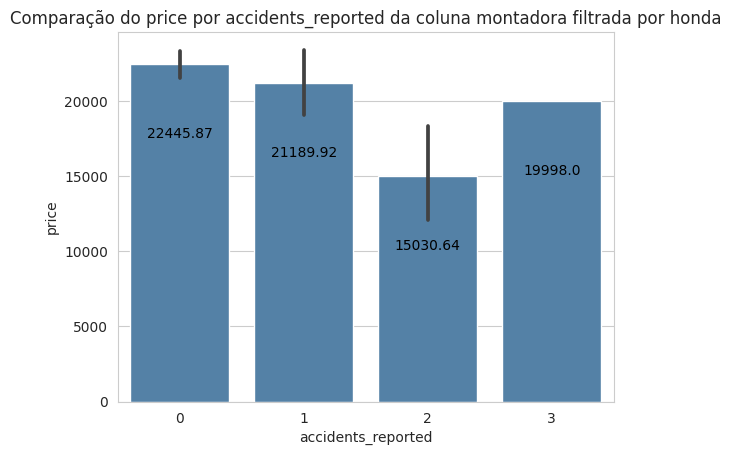

In [49]:
visualizacao('montadora', 'honda', 'accidents_reported', 'price')

Comentário:
O número de acidentes em carros da honda não interfere muito em seu valor, fator curioso é que carros com 3 acidentes tendem a ser mais caros que os carro com apenas 2, e seu valor quase se iguala a carros com 1 acidente reportado.

<Axes: title={'center': 'Comparação do price por owners da coluna montadora filtrada por honda'}, xlabel='owners', ylabel='price'>

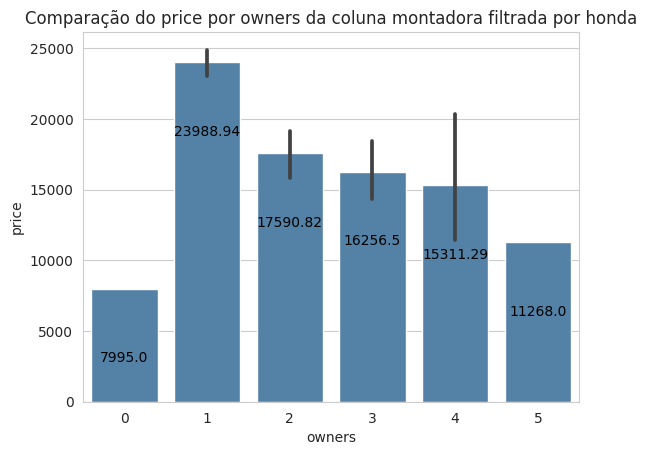

In [50]:
visualizacao('montadora', 'honda', 'owners', 'price')

Comentário: O número de dono interferiiu no valor dos carros da honda, quanto mais donos, mais baratos os carros. A primeira coluna com o valor 0 está abaixo das outras pelo fato de que deve existir poucos carros honda com 0 donos na base de dados.

## ford

<Axes: title={'center': 'Comparação do price por accidents_reported da coluna montadora filtrada por ford'}, xlabel='accidents_reported', ylabel='price'>

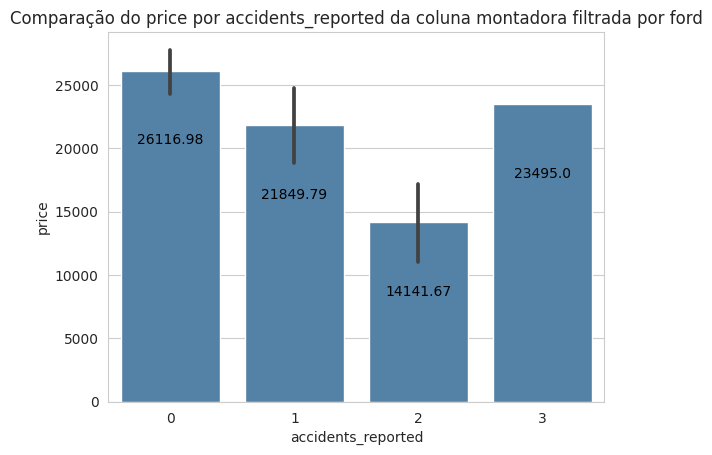

In [51]:
visualizacao('montadora', 'ford', 'accidents_reported', 'price')

Comentário:
Carros da ford, em número de acidentes reportados, seguem a mesma ideia de carros da honda, veículos com 3 acidentes reportados valem mais que os veículos com apenas 2 e 1.

<Axes: title={'center': 'Comparação do price por owners da coluna montadora filtrada por ford'}, xlabel='owners', ylabel='price'>

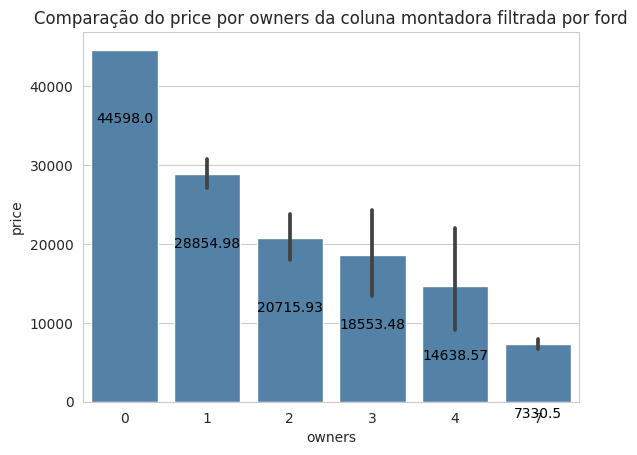

In [52]:
visualizacao('montadora', 'ford', 'owners', 'price')

Comentário: Nesse caso temos bastante veículos com 0 donos sendo assim tem o maior valor da categoria, e os valores vão decaindo conforme o número de donos vai aumentando.

In [53]:
# padronizando as colunas miles, aaccidents_reported e owners

milhas_media = df['miles'].mean()
milhas_desvio_padrao = df['miles'].std()
df['miles'] = df['miles'].apply(lambda milhas: (milhas - milhas_media)/milhas_desvio_padrao)

acidentes_media = df['accidents_reported'].mean()
acidentes_desvio_padrao = df['accidents_reported'].std()
df['accidents_reported'] = df['accidents_reported'].apply(lambda acidentes: (acidentes - acidentes_media)/acidentes_desvio_padrao)

donos_media = df['owners'].mean()
donos_desvio_padrao = df['owners'].std()
df['owners'] = df['owners'].apply(lambda donos: (donos - donos_media)/donos_desvio_padrao)

In [54]:
df.tail()

,name,year,miles,color,condition,price,montadora,nome,color_exterior,color_interior,accidents_reported,owners
2835,ford escape,2013,1.328380,"silver exterior, unknown interior","2 accidents reported, 3 owners",8995,ford,escape,silver,unknown,2.875457,1.723272
2836,mercedes-benz r-class,2009,1.933959,"black exterior, black interior","1 accident reported, 3 owners",9495,mercedes-benz,r-class,black,black,1.204774,1.723272
2837,mercedes-benz glc,2022,-0.609730,"gray exterior, gray interior","no accidents reported, 2 owners",29999,mercedes-benz,glc,gray,gray,-0.465909,0.568733
2838,honda cr-v,2021,0.002235,"gray exterior, unknown interior","no accidents reported, 1 owner",22992,honda,cr-v,gray,unknown,-0.465909,-0.585807
2839,honda civic,2021,-0.647666,"white exterior, black interior","no accidents reported, 1 owner",24135,honda,civic,white,black,-0.465909,-0.585807


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                2840 non-null   object 
 1   year                2840 non-null   int64  
 2   miles               2840 non-null   float64
 3   color               2840 non-null   object 
 4   condition           2840 non-null   object 
 5   price               2840 non-null   int64  
 6   montadora           2840 non-null   object 
 7   nome                2840 non-null   object 
 8   color_exterior      2840 non-null   object 
 9   color_interior      2840 non-null   object 
 10  accidents_reported  2840 non-null   float64
 11  owners              2840 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 266.4+ KB


In [56]:
df['year'] = df['year'].apply(lambda ano: str(ano))

In [57]:
# criação de um novo DataFrame com as colunas padronizadas

df_carros = df[[
    'montadora',
    'nome',
    'year',
    'miles',
    'color_exterior',
    'color_interior',
    'accidents_reported',
    'owners',
    'price'
]]

In [58]:
df_carros.tail()

,montadora,nome,year,miles,color_exterior,color_interior,accidents_reported,owners,price
2835,ford,escape,2013,1.328380,silver,unknown,2.875457,1.723272,8995
2836,mercedes-benz,r-class,2009,1.933959,black,black,1.204774,1.723272,9495
2837,mercedes-benz,glc,2022,-0.609730,gray,gray,-0.465909,0.568733,29999
2838,honda,cr-v,2021,0.002235,gray,unknown,-0.465909,-0.585807,22992
2839,honda,civic,2021,-0.647666,white,black,-0.465909,-0.585807,24135


In [59]:
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   montadora           2840 non-null   object 
 1   nome                2840 non-null   object 
 2   year                2840 non-null   object 
 3   miles               2840 non-null   float64
 4   color_exterior      2840 non-null   object 
 5   color_interior      2840 non-null   object 
 6   accidents_reported  2840 non-null   float64
 7   owners              2840 non-null   float64
 8   price               2840 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 199.8+ KB


In [60]:
# codificação dos vlaores de todas as colunas utilizando o metodo one hot encoding e padronizando os valores em floats

df_carros_encoded = pd.get_dummies(df_carros, columns=['montadora','nome','year','color_exterior','color_interior'])

In [61]:
df_carros_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Columns: 405 entries, miles to color_interior_yellow
dtypes: float64(3), int64(1), uint8(401)
memory usage: 1.2 MB


In [62]:
df_carros_encoded.head()

,miles,accidents_reported,owners,price,montadora_acura,montadora_alfa_romeo,montadora_aston_martin,montadora_audi,montadora_bentley,montadora_bmw,...,color_interior_black,color_interior_blue,color_interior_brown,color_interior_gray,color_interior_green,color_interior_orange,color_interior_red,color_interior_unknown,color_interior_white,color_interior_yellow
0,-0.239360,-0.465909,-0.585807,15988,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.959378,1.204774,-0.585807,38008,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,-0.473089,-0.465909,-0.585807,24988,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.354923,-0.465909,-0.585807,18998,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.620640,-0.465909,-0.585807,19498,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## O modelo utilizado para o treinamento será de regressão linear

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
model = LinearRegression()

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
# Aqui separamos os dados em variaveis preditoras de treino e teste e a variável resposta em treino e teste

predictors_train, predictors_test, target_train, target_test = train_test_split(
    df_carros_encoded.drop(['price'], axis=1),
    df_carros_encoded['price'],
    test_size=0.10, # 0.10 ´significa 10% dos dados foi pra teste e o restante treino
    random_state=123
)

In [124]:
predictors_train.head()

,miles,accidents_reported,owners,montadora_acura,montadora_alfa_romeo,montadora_aston_martin,montadora_audi,montadora_bentley,montadora_bmw,montadora_buick,...,color_interior_black,color_interior_blue,color_interior_brown,color_interior_gray,color_interior_green,color_interior_orange,color_interior_red,color_interior_unknown,color_interior_white,color_interior_yellow
1143,1.509481,6.216822,1.723272,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1548,-0.635386,-0.465909,-0.585807,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1486,-1.201906,-0.465909,-0.585807,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1866,-0.730364,-0.465909,-0.585807,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2351,1.456086,-0.465909,1.723272,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [125]:
predictors_train.shape

(2556, 404)

In [126]:
predictors_test.head()

,miles,accidents_reported,owners,montadora_acura,montadora_alfa_romeo,montadora_aston_martin,montadora_audi,montadora_bentley,montadora_bmw,montadora_buick,...,color_interior_black,color_interior_blue,color_interior_brown,color_interior_gray,color_interior_green,color_interior_orange,color_interior_red,color_interior_unknown,color_interior_white,color_interior_yellow
1503,1.152844,-0.465909,1.723272,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2474,-0.504858,-0.465909,-0.585807,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2311,1.515402,4.546139,0.568733,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
937,-0.544247,1.204774,-0.585807,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1213,0.249807,-0.465909,-0.585807,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [127]:
predictors_test.shape

(284, 404)

In [128]:
target_train.head()

1143    15995
1548    29998
1486    33500
1866    19998
2351    10995
Name: price, dtype: int64

In [129]:
target_test.head()

1503    22998
2474    17995
2311     9995
937     31187
1213    29995
Name: price, dtype: int64

In [130]:
model = model.fit(predictors_train, target_train)

In [131]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['miles', 'accidents_reported', 'owners', 'montadora_acura',
        'montadora_alfa_romeo', 'montadora_aston_martin', 'montadora_audi',
        'montadora_bentley', 'montadora_bmw', 'montadora_buick',
        'montadora_cadillac', 'montadora_chevrolet', 'montadora_chrysler',
        'montadora_dodge', 'montadora_fiat', 'montadora_ford',
        'montadora_genesis', 'montadora_gmc', 'montadora_honda',
        'montadora_hyundai', 'montadora_infiniti', 'montadora_jaguar',
        'montadora_jeep', 'montadora_karma', 'montadora_kia',
        'montadora_land_rover', 'montadora_land_rovver', 'montadora_lexus',
        'montadora_lincoln', 'montadora_maserati', 'montadora_mazda',
        'montadora_mclaren', 'montadora_mercedes-benz', 'montadora_mini',
        'montadora_mitsubishi', 'montadora_nissan', 'montadora_pontiac',
        'montadora_porsche', 'montadora_ram', 'montadora_rolls-

In [132]:
a = model.coef_

In [133]:
b = model.intercept_

In [134]:
colunas = df_carros_encoded.drop(['price'], axis=1).columns.tolist()

## Escolha os dados do veículo em questão, **lembre-se de consultar o material adicional para saber quais veículos, anos e cores podem ser utilizadas nesse modelo de predição.**

In [135]:
montadora = (input('Qual a montadora do seu carro? ')).lower()
carro = (input('Qual o modelo do veículo? ')).lower()
milhas = (input('Quantas milhas tem seu veículo? ')).lower()
ano = (input('Qual o ano do veículo? ')).lower()
acidentes_reportados = (input('Quantos acidentes foram reportados? ')).lower()
donos = (input('Quantos donos ja possuíram o veículo? ')).lower()
cor_interior = (input('Qual a cor do interior do veículo? ')).lower()
cor_exterior = (input('Qual a cor exterior do veículo? ')).lower()

nome_montadora = 'montadora_'+ montadora
nome_carro = 'nome_'+carro
cor_i = 'color_interior_'+ cor_interior
cor_e = 'color_exterior_'+ cor_exterior
ano = 'year_'+str(ano)
donos = int((int(donos) - donos_media)/donos_desvio_padrao)
acidentes = int((int(acidentes_reportados) - acidentes_media)/acidentes_desvio_padrao)
milhas = int((int(milhas) - milhas_media)/milhas_desvio_padrao)


carro = {
    'miles':milhas,
    'accidents_reported':acidentes,
    'owners':donos,
    nome_montadora:int(1),
    nome_carro:int(1),
    ano: int(1),
    cor_i:int(1),
    cor_e:int(1),
}


In [136]:
carro_novo = []

for chave in colunas:
    if chave in carro:
        carro_novo.append(carro[chave])
    else:
        carro_novo.append(int(0))

In [137]:
new_car = np.array([carro_novo])

In [138]:
valor = model.predict(new_car.reshape(1, -1)).round(2)

c:\Users\sonia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Abaixo segue o valor predito do veículo de acordo com os parâmetros que foram passados


In [139]:
print('O valor do seu carro é: $'+str(valor[0]))

O valor do seu carro é: $7730.0


In [140]:
from sklearn.metrics import mean_squared_error

In [141]:
target_predicted = model.predict(predictors_test)

In [142]:
rmse_v2 = np.sqrt(mean_squared_error(target_test, target_predicted))
#print(rmse_v2)

In [143]:
print(rmse_v2)

36023716833664.984
